<a href="https://colab.research.google.com/github/Nagmashaik123/Nagma_INFO5731_Spring2021/blob/main/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [ ]:
#importing required libraries
import pandas as pd
from nltk.corpus import stopwords
import nltk
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk


In [ ]:
from sklearn import metrics
import gensim
import scipy
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [ ]:
nltk.download('wordnet')
from sklearn.cluster import KMeans
import numpy as np 
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#load the data
data=pd.read_csv("Amazon_Unlocked_Mobile.csv")

In [ ]:
data[:4000]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
3995,"Apple A1533 Unlocked iPhone 5S Smart Phone, 16...",Apple,115.00,5,Perfect.,0.0
3996,"Apple A1533 Unlocked iPhone 5S Smart Phone, 16...",Apple,115.00,3,It does not connect to network and internet we...,0.0
3997,"Apple A1533 Unlocked iPhone 5S Smart Phone, 16...",Apple,115.00,5,Good,0.0
3998,"Apple A1533 Unlocked iPhone 5S Smart Phone, 16...",Apple,115.00,4,Phone is in good working condition,0.0


In [ ]:
data.shape

(118012, 6)

In [ ]:

data_after_removing_null_values = data.dropna()
data_after_removing_null_values.shape

(93532, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


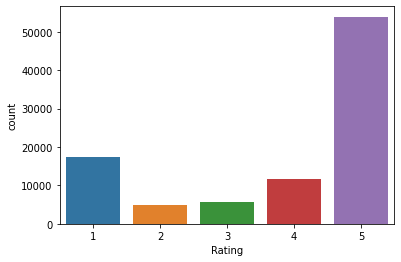

In [ ]:
# Visualising data
import seaborn as sns
sns.countplot(data_after_removing_null_values.Rating)

In [ ]:
def review_classification(rating):
    if rating < 3:
        return 'negative'
    return 'positive'

rating_classification = data_after_removing_null_values['Rating'].map(review_classification) 
data_after_removing_null_values['Rating'] = rating_classification

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
data_after_removing_null_values['Rating'].value_counts()

positive    71436
negative    22096
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


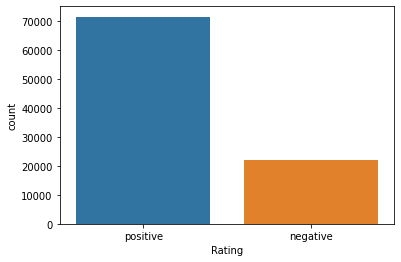

In [ ]:
import seaborn as sns
sns.countplot(data_after_removing_null_values.Rating)

In [ ]:
import re
i=0;
for sent in data_after_removing_null_values['Reviews'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [ ]:
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

In [ ]:
# Cleaning text data
import re
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: cleanhtml(x))
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# Bag of words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_null_values_removal['Cleaned Text'] = data_null_values_removal['Cleaned Text'].apply(lambda item: " ".join(item for item in item.split() if item not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Bag of words - K Means
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(data_after_removing_null_values['Cleaned Text'].values)

In [ ]:
column_names = count_vect.get_feature_names()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
model.fit(bow)

In [ ]:
labels = model.labels_
cluster_center = model.cluster_centers_
cluster_center

array([[8.18773016e-03, 8.03102719e-04, 1.37115098e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.04087870e-03, 8.47226845e-05, 3.63097219e-05, ...,
        0.00000000e+00, 1.21032406e-05, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.11486486e-01, 1.04729730e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.29385844e-03, 1.87276232e-04, 1.10162490e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.69687621e-02, 4.82067104e-03, 0.00000000e+00, ...,
        1.92826841e-04, 0.00000000e+00, 1.92826841e-04]])

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

0.0280529660600268

In [ ]:
df = data_after_removing_null_values
df['Bow Clus Label'] = model.labels_
df.groupby(['Bow Clus Label'])['Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Bow Clus Label
0     51052
1    165245
2        28
3        56
4      4939
5     15217
6      1541
7       296
8     90775
9      5186
Name: Reviews, dtype: int64

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 great
 good
 one
 screen
 like
 use
 battery
 would
 new
Cluster 1: good
 great
 product
 works
 excellent
 love
 one
 like
 work
 new
Cluster 2: apple
 iphone
 android
 samsung
 even
 know
 phones
 also
 year
 one
Cluster 3: phone
 screen
 battery
 use
 one
 also
 apps
 camera
 android
 like
Cluster 4: phone
 one
 use
 like
 would
 battery
 screen
 get
 great
 good
Cluster 5: phone
 great
 one
 would
 use
 good
 get
 like
 new
 screen
Cluster 6: phone
 screen
 one
 like
 use
 get
 battery
 good
 camera
 would
Cluster 7: phone
 screen
 battery
 one
 like
 use
 get
 good
 camera
 would
Cluster 8: phone
 great
 good
 love
 works
 one
 like
 price
 battery
 use
Cluster 9: phone
 screen
 battery
 like
 good
 use
 one
 camera
 great
 get


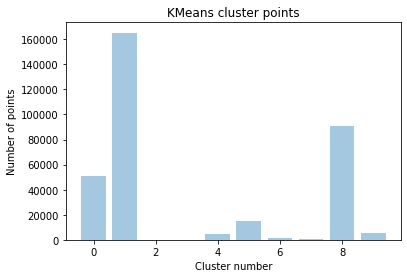

In [ ]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
#K Means using Average of Words to Vector analysis
list_of_sentences = []
for sentence in data_after_removing_null_values['Cleaned Text'].values:
    list_of_sentences.append(sentence.split())

In [ ]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sentences,size=100, workers=4)

In [ ]:
import numpy as np
sent_vectors = []
for sent in list_of_sentences:
  sent_vec = np.zeros(100)
  cnt_words = 0
  for word in sent:
    try:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
    except:
      pass
  sent_vec /= cnt_words
  sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(334335, 100)

In [ ]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

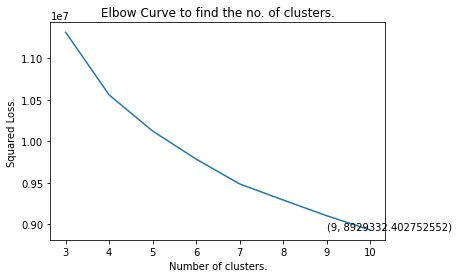

In [ ]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors)
    squared_errors.append(kmeans.inertia_)
    
optimal_clusters = np.argmin(squared_errors) + 2 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

In [ ]:

print ("No of clusters - ", optimal_clusters)
print ("The loss for cluster - ", min(squared_errors))

No of clusters -  9
The loss for cluster -  8929332.402752552


In [ ]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
word_cluster_pred = model2.predict(sent_vectors)
word_cluster_pred_2 = model2.labels_
word_cluster_center = model2.cluster_centers_
word_cluster_center[1:2]

array([[-0.16820925, -0.90793449, -0.61149361, -0.18464765, -0.39984576,
         0.29462532, -0.17866402,  0.07001735, -0.42818375, -0.16052607,
         0.42476592,  0.34521397, -0.18419926,  0.00128981, -0.14183734,
         0.16307869, -0.11800796, -0.6156297 ,  0.22191285, -0.16367937,
         0.09679506, -0.14036884, -0.06967093, -0.49853858, -0.63063842,
         0.48035292, -0.15917177,  0.18760166,  0.36616448,  0.14260393,
         0.267505  ,  0.18769864, -0.01679681, -0.08330452,  0.02600972,
         0.42983827,  0.08900368, -0.30960198,  0.37152327, -0.0128089 ,
         0.00643326,  0.35437856,  0.58245666, -0.47621274,  0.25428874,
         0.20299991, -0.01900208, -0.00468615, -0.12466702,  0.57819047,
         0.17607329, -0.44797177, -0.07348776, -0.75070319, -0.40476478,
         0.280265  ,  0.10601838, -0.23030104, -0.59940186, -0.15909017,
         0.2321809 , -0.29418347, -0.36982741,  0.00304478, -0.00511044,
         0.10455966, -0.65743893, -0.32272695,  0.1

In [ ]:
for i in range(4):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

In [ ]:
# DB SCAN clustering
from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [ ]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

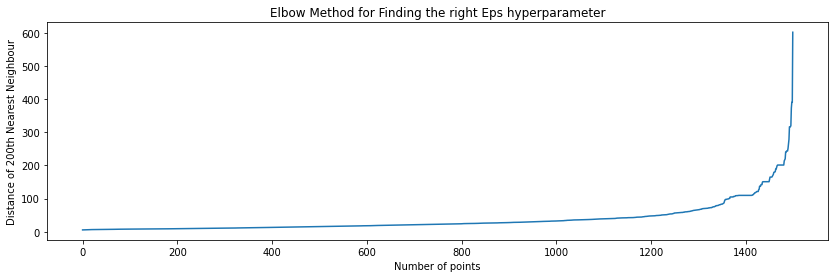

In [ ]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [ ]:
dbscandf = df
dbscandf['AVG-W2V Clus Label'] = model.labels_
dbscandf.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors, method='ward'))
plt.axhline(y=35)

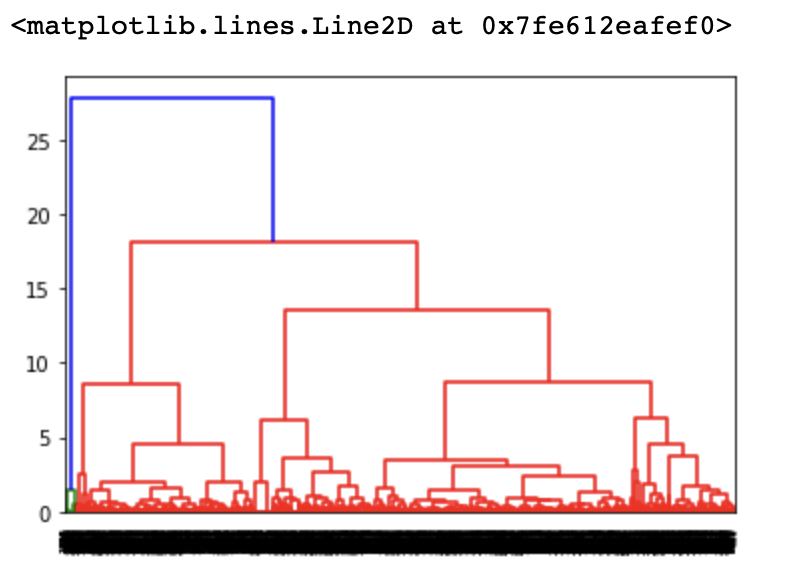

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
hcdf = dbscandf
hcdf['AVG-W2V Clus Label'] = cluster.labels_

In [ ]:
hcdf.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

In [ ]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
Very pleased


The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not including cost of purchase) I have a usable phone. The phone should not have been sold in the state it was in.


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
It works good but it goes slow sometimes but its a very good phone I love it


Phone good just a little slow phone old but it's a great phone temporary right now. thank you for the great deal


______________________________________________________________________
2 reviews of assigned to cluster  2
----------------------------------------------------------------------
Great phone to replace my lost phone. The only thing is the volume up button does not work, but I can still go into settings to adjust. Other than that, it does the job until I am eligible to upgrade my phone again.Thaanks!


It's battery life is great. It's very responsive to touch. The only issue is that sometimes the screen goes black and you have to press the top button several times to get the screen to re-illuminate.


______________________________________________________________________
2 reviews of assigned to cluster  3
----------------------------------------------------------------------
excelente


excelente


______________________________________________________________________
2 reviews of assigned to cluster  4
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


______________________________________________________________________
In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.
Using K Means we can easily classify the clusters into groups and also we can find the optimum number of clusters and train the KMeans model using the optimum number of clusters which gives us best model to classify the Reviews. Second best model is Hierarchical clustering, but it will be very difficult to classify the clusters using Hierarchical clustering. DBScan classifed all the reviews into single cluster which is not best fit.